# Linear interpolation for Internal energy of Superheated water

A function named "linear_interpolation" is defined, arguments of the same are T1, T2 (the two ends of the temperatures), T (the temperature at which a property needs to be interpolated) and Prop1, Prop2 are the proeprty values at T1 and T2.

In [1]:
def linear_interpolation(x, x1, x2, y1, y2):
    # Function to interpolate between two known points
    return y1 + (x - x1) / (x2 - x1) * (y2 - y1)

A function named "calculate_relative_error" is defined, arguments of the same are x1, x2 (the two ends of the input variable), x (the x-value at which a property needs to be interpolated) and y1, y2 are the property values at x1 and x2.

In [2]:
def calculate_relative_error(x, x1, x2, y1, y2, fluid):
    # Calculate the interpolated value
    y_interpolated = linear_interpolation(x, x1, x2, y1, y2)
    
    # Get the value from CoolProp
    y_coolprop = CP.PropsSI("U", "P", P, "T", x, fluid) / 1e3  # Convert from J/kg to kJ/kg
    
    # Calculate absolute and relative errors
    absolute_error = abs(y_coolprop - y_interpolated)
    relative_error = (absolute_error / y_coolprop) * 100
    
    return relative_error

In [3]:
import CoolProp.CoolProp as CP
# Example usage from Superheated water:
# https://pressbooks.bccampus.ca/thermo1/back-matter/thermodynamic-properties-of-water/#TA2
T1, T2 = 273.15 + 100, 273.15 + 150  # Temperatures in K
P = 10e3  # in Pa
U1, U2 = 2515.49, 2587.91  # Properties in SI units
fluid = "water"
T = 273.15 + 133  # Temperature at which we want the interpolated property
Prop_interpolated = linear_interpolation(T, T1, T2, U1, U2)
print("Interpolated property at {} K: {} kJ/kg".format(T, round(Prop_interpolated, 2)))


cool_prop = CP.PropsSI("U", "P", P, "T", T, fluid) / 1e3  ## in kJ/kg
print("Property from CoolProp at {} K: {} kJ/kg".format(T, round(cool_prop, 2)))

absolute_difference = abs(cool_prop - Prop_interpolated)
percentage_difference = (absolute_difference / Prop_interpolated) * 100
print("Relative difference :{} %".format(round(percentage_difference, 4)))

Interpolated property at 406.15 K: 2563.29 kJ/kg
Property from CoolProp at 406.15 K: 2563.19 kJ/kg
Relative difference :0.0036 %


# Linear interpolation for Internal energy of R-134a refrigerant

In [4]:
import CoolProp.CoolProp as CP


# Example usage from Superheated R134a:
# https://pressbooks.bccampus.ca/thermo1/back-matter/thermodynamic-properties-of-r134a/#TC2
T1, T2 = 273.15 + 40, 273.15 + 50  # Temperatures in K
P = 100e3  # in Pa
U1, U2 = 412.4, 420.37  # Properties in SI units
fluid = "R134a"
T = 273.15 + 43  # Temperature at which we want the interpolated property
Prop_interpolated = linear_interpolation(T, T1, T2, U1, U2)
print("Interpolated property at {} K: {} kJ/kg".format(T, round(Prop_interpolated,2)))


cool_prop = CP.PropsSI("U", "P", P, "T", T, fluid) / 1e3  ## in kJ/kg
print("Property from CoolProp at {} K: {} kJ/kg".format(T, round(cool_prop,2)))

absolute_difference = abs(cool_prop - Prop_interpolated)
percentage_difference = (absolute_difference / Prop_interpolated) * 100
print("Relative difference :{} %".format(round(percentage_difference,4)))

Interpolated property at 316.15 K: 414.79 kJ/kg
Property from CoolProp at 316.15 K: 414.77 kJ/kg
Relative difference :0.0046 %


In [5]:
import CoolProp.CoolProp as CP
import numpy as np
import matplotlib.pyplot as plt

# Constants
P = 10e3  # Pressure in Pa
fluid = "R134a"
T_target = 273.15 + 135  # Target temperature for property evaluation

# Range of interval sizes
interval_sizes = np.linspace(10,200,20)
relative_errors = []

# Loop over interval sizes and calculate relative errors
for interval in interval_sizes:
    T1 = T_target - interval / 2
    T2 = T_target + interval / 2
    
    # Get properties from CoolProp for the interval boundaries
    U1 = CP.PropsSI("U", "P", P, "T", T1, fluid) / 1e3
    U2 = CP.PropsSI("U", "P", P, "T", T2, fluid) / 1e3
    
    # Calculate relative error
    error = calculate_relative_error(T_target, T1, T2, U1, U2, fluid)
    relative_errors.append(error)

# A plot to illustrate the relative error as a function of size of interval of input

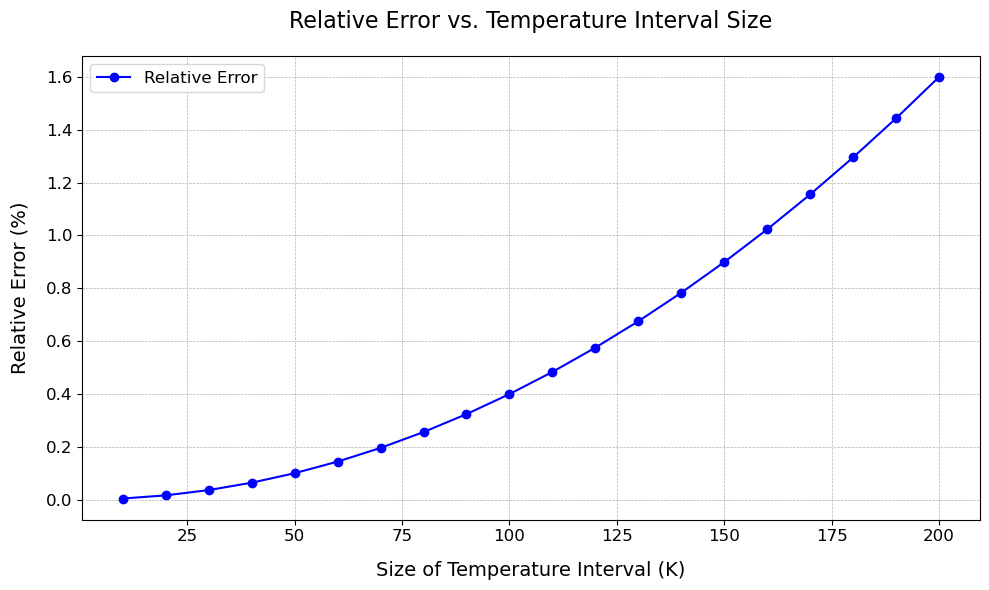

In [6]:
# Plotting
# Plotting with logarithmic scale and improved aesthetics
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.plot(interval_sizes, relative_errors, marker='o', linestyle='-', color='blue', label='Relative Error')  # Adds color, line style, and markers

plt.xlabel('Size of Temperature Interval (K)', fontsize=14, labelpad=12)
plt.ylabel('Relative Error (%)', fontsize=14, labelpad=12)
plt.title('Relative Error vs. Temperature Interval Size', fontsize=16, pad=20)

#plt.xscale('log')  # Logarithmic scale for the x-axis
#plt.yscale('log')  # Logarithmic scale for the y-axis

plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Adds gridlines for both major and minor ticks and customizes their style
plt.tick_params(labelsize=12)  # Adjust the size of the axis ticks labels

plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area

plt.show()